### SAMPLE USAGE
#### 1) Read XML file

We Assume that we will have a **xml file** which we can read **first initial** state of the vehicles and 
**lanelet network** of way. We directly took this **reading** from tutorial session.

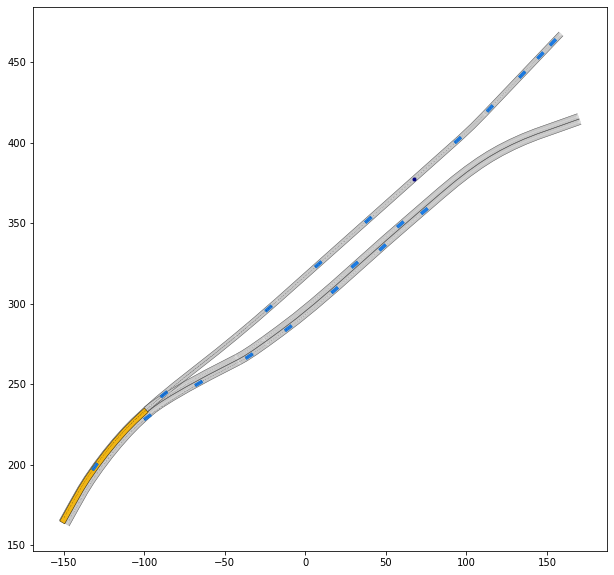

In [32]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be opened
#file_path = "ZAM_Tutorial-1_1_T-1.xml"
#file_path = "ZAM_Tjunction-1_66_T-1.xml"
file_path = "CHN_Cho-2_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    break


#### 2) Create Graph

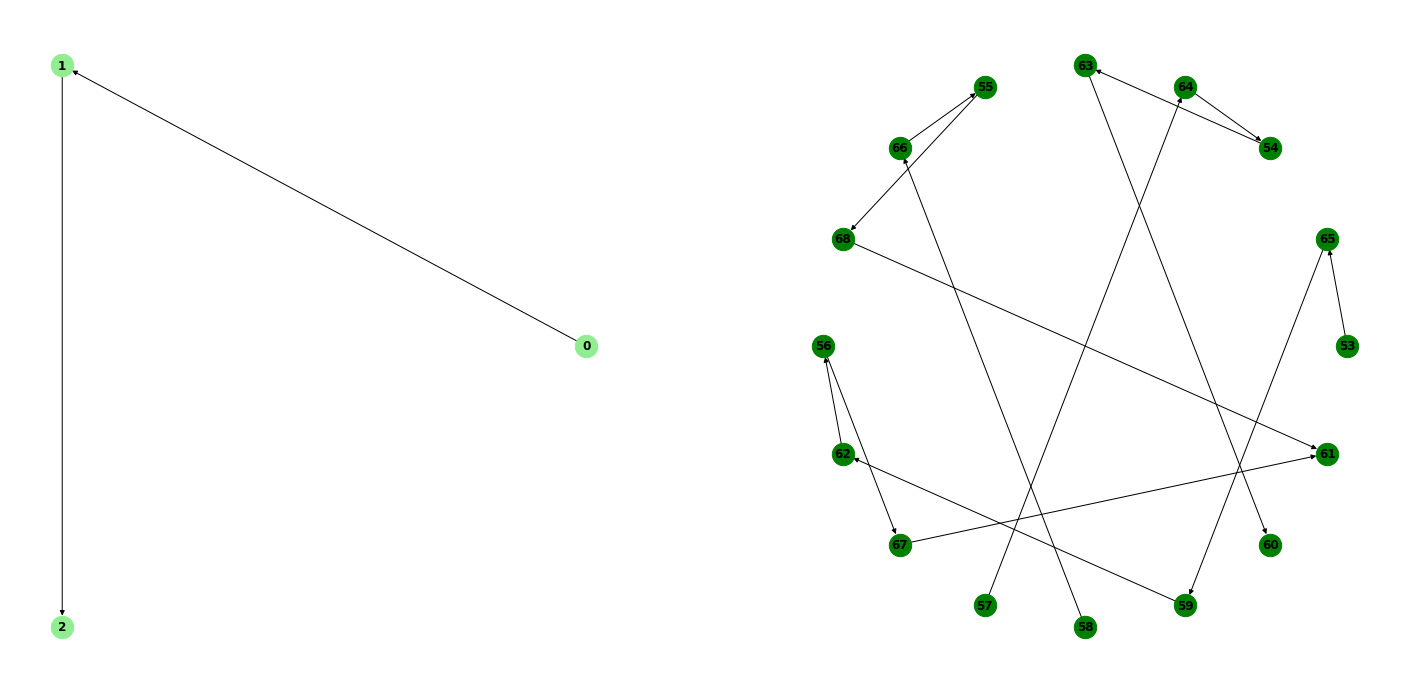

In [33]:
#distance
# lanelet_id
#adj_left=None, adj_left_same_direction=None, adj_right=None, ad_right_same_direction=None, 
#predecessor, succesor
#line_marking_right_vertices

########## Sample Usage ###########
from GraphBasedDistanceMeasure import CreateLaneletGraph
options1 = {
    'node_color': 'lightgreen',
    'node_size': 500,
    'width': 1,
}
options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

import networkx as nx
lanelets = scenario.lanelet_network.lanelets
G = CreateLaneletGraph(lanelets)
plt.subplot(121)
nx.draw_circular(G.nodes[lanelets[0].lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
plt.subplot(122)
nx.draw_circular(G,with_labels=True, font_weight='bold', **options2)
plt.show()

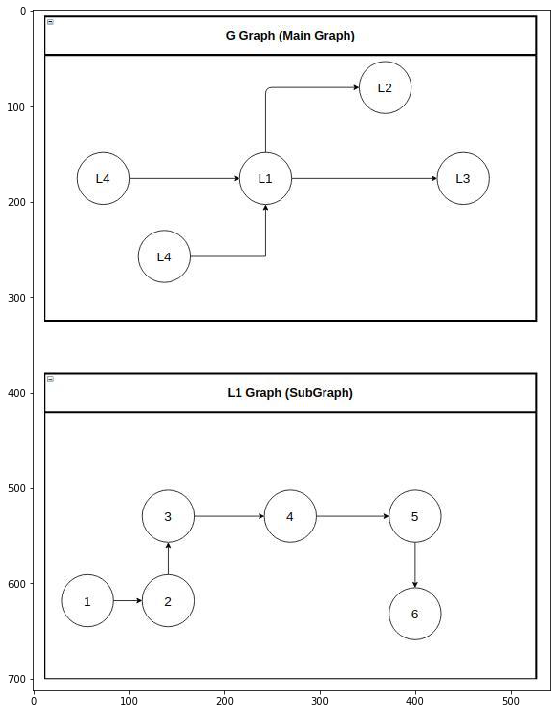

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams['figure.figsize'] = (25.0, 12.5) # set default size of plots
img=mpimg.imread('SampleGraph.jpg')
imgplot = plt.imshow(img)
plt.show()


[53, 65, 54, 64, 63, 55, 66, 68, 56, 62, 67, 57, 58, 59, 60, 61]


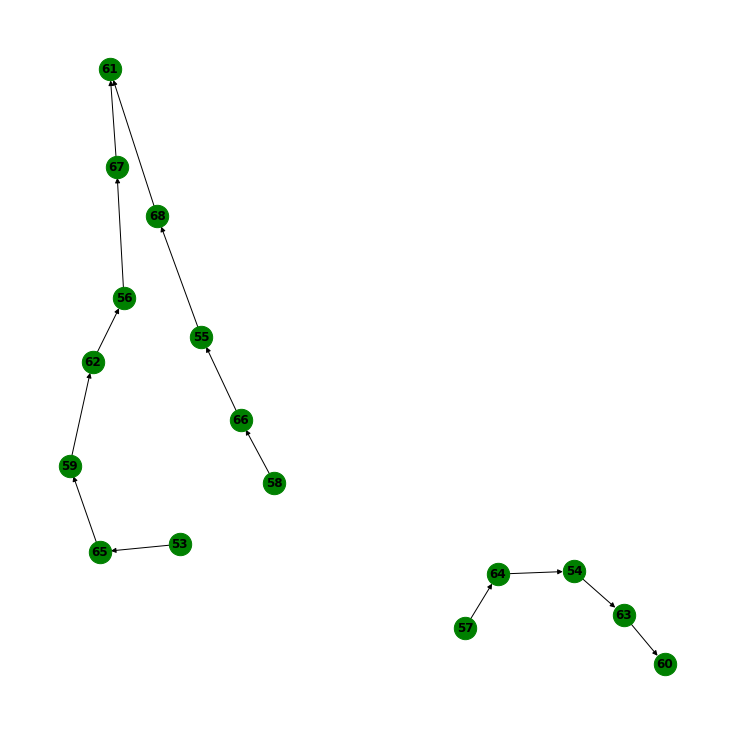

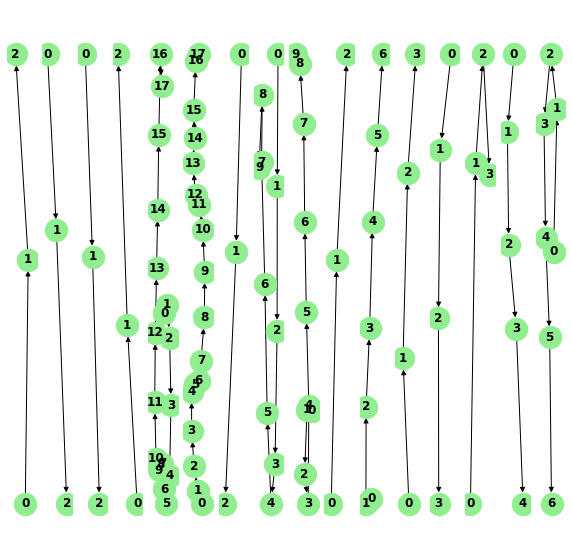

In [35]:
print(G.nodes)
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
nx.draw(G,with_labels=True, font_weight='bold', **options2)
plt.show()
i = 1
for lanelet in lanelets:
    #print(lanelet)
    plt.subplot(1, len(lanelets), i)
    nx.draw(G.nodes[lanelet.lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
    #print(lanelet.adj_left_same_direction, ": ", lanelet.adj_left)
    #print(lanelet.adj_right_same_direction, ": ", lanelet.adj_right)
    """if 53 in G.nodes[lanelet.lanelet_id]['adj_lanelet']: #adjacent lanelet control # contain()
        print(True)"""
    i = i+1
plt.show()

#### 3) Set Initial Vertex of the Given Vehicles ( v(c0)):

According to paper we have just **initial states** of the vehicles so we just use the **initial states** of the vehicles in the xml file. We will set vehicle's initial states via a method called **setInitialVertextoVehicles** with respect to paper.

In [36]:
### Vertex Sample Usage###
from GraphBasedDistanceMeasure import v
obstacles = scenario.obstacles
for o in obstacles:
    print("obstacle id: ", o.obstacle_id)
    lanelet, node= v(o,G)
    print("initial lanelet: ", lanelet, "| initial node of the obstacle in the lanelet: ", node)
    print("_______________________")
    

obstacle id:  35
initial lanelet:  68 | initial node of the obstacle in the lanelet:  3
_______________________
obstacle id:  39
initial lanelet:  61 | initial node of the obstacle in the lanelet:  5
_______________________
obstacle id:  311
initial lanelet:  60 | initial node of the obstacle in the lanelet:  0
_______________________
obstacle id:  313
initial lanelet:  62 | initial node of the obstacle in the lanelet:  0
_______________________
obstacle id:  315
initial lanelet:  63 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  317
initial lanelet:  64 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  318
initial lanelet:  59 | initial node of the obstacle in the lanelet:  2
_______________________
obstacle id:  319
initial lanelet:  58 | initial node of the obstacle in the lanelet:  13
_______________________
obstacle id:  320
initial lanelet:  57 | initial node of the obstacle in the lanelet:  16
_______

In [5]:
#finding_shortest_path_between_vertices PR(v1, v2)   the formula from the paper and R = G in the code
for lanelet in lanelets:
    #finding_shortest_path_between_vertices PR(v1, v2)   the formula from the paper and R = G in the code
    pointcount = len(G.nodes[lanelet.lanelet_id]['graph'].nodes)
    for i in range(pointcount):
        print(G.nodes[lanelet.lanelet_id]['graph'].nodes[i])


{'distance': 0.0, 'vertices': array([158.7366, 467.5413])}
{'distance': 34.348551559345275, 'vertices': array([135.04045, 442.67535])}
{'distance': 68.69710141592583, 'vertices': array([111.34425, 417.80945])}
{'distance': 0.0, 'vertices': array([-40.86695, 263.8969 ])}
{'distance': 0.12108328745126376, 'vertices': array([-40.97515, 263.84255])}
{'distance': 0.24699684907189093, 'vertices': array([-41.0876, 263.7859])}
{'distance': 0.0, 'vertices': array([-42.47795, 267.0033 ])}
{'distance': 0.08014494681509614, 'vertices': array([-42.55  , 266.9682])}
{'distance': 0.21368360226738203, 'vertices': array([-42.66925, 266.9081 ])}
{'distance': 0.0, 'vertices': array([-35.1048, 286.4404])}
{'distance': 5.139055765410622, 'vertices': array([-39.0398, 283.135 ])}
{'distance': 10.278143690568164, 'vertices': array([-42.9748 , 279.82955])}
{'distance': 0.0, 'vertices': array([170.68175, 413.06335])}
{'distance': 13.54565514104063, 'vertices': array([157.92235, 408.51555])}
{'distance': 28.0947